# NLP Hotel review analysis
Benedikt Middelstaedt - 10 June 2024 - BrainStation Data Science & AI Bootcamp 
______________________________________________________________________________

## Table of content

1. Basic Setup
2. Introduction
3. Conclusion
4. Tasks

    4.1 Exploratory Data Analysis

    4.2 Preprocessing
    
    4.3 Logistic regression model

    4.4 PCA with a decision tree classifier

    4.5 In-depth evaluation

## 1. Basic setup

The Conda Environment plotly_bokeh with Python version 3.8.19 is used to process the project. Due to the size of the sklearn library, the corresponding module is loaded when required and not at the beginning.

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import scipy as sp



Allgemeine Einstellungen

In [2]:
pd.set_option('display.max_columns', None)

Folgende Funktionen werden im weiteren Verlauf benutzt: 

In [3]:
import nltk
import string

# Download the stopwords data
nltk.download('stopwords')

# Import the stopwords from NLTK corpus
from nltk.corpus import stopwords 

# Get the list of English stopwords
ENGLISH_STOP_WORDS = stopwords.words('english')



from nltk.stem import PorterStemmer
stemmer = nltk.stem.PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BMidd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
### Functions


def custom_tokenizer(sentence):
    """
    Tokenizes a given sentence by performing the following steps:
    1. Remove punctuation and convert all characters to lowercase.
    2. Split the sentence into individual words.
    3. Remove stopwords and any empty tokens.
    4. Stem the remaining words using PorterStemmer.
    
    Args:
    sentence (str): The input sentence to be tokenized.
    
    Returns:
    list: A list of stemmed words after removing stopwords and punctuation.
    """
    
    # Remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark, '').lower()

    # Split the sentence into individual words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # Remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word != ''):
            # Stem the word
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words


In [224]:
def rename_tokens(matrix, mapping,token_list):
    indices = [list(mapping.keys()).index(token) for token in token_list]
    return matrix[:, indices]

Übersicht über die Benutzten Dataframes, wichtige Variablen und Zwischenergebnisse:

In [5]:
### dataframes, variables, and saved solutions

## 2. Introduction

Datensatz vom 3.8.2017 - bis zum 4.8.2015 

## 3. Conclusion

## 4. Hotel review analysis

The following is a step-by-step procedure for analysing the data set. 

### 4.1 Exploratory Data Analysis


#### Get an understanding of the data 

This was followed by an initial overview of the data set in its raw form: 

Remark: 
In the first load, the column ‘Unnamed: 0’ appeared, this had the same information content as the index that Panda's read_csv automatically assigns.

It is possible to delete this. This can be used subsequently instead of the automatic index or the argument index_col = 0 can be included in the import of the file in order to use it immediately as an index.
As the removal is a one-off operation that leads to errors if repeated, index_col = 0 has been added at the top.

Source: 

https://stackoverflow.com/questions/36519086/how-to-get-rid-of-unnamed-0-column-in-a-pandas-dataframe-read-in-from-csv-fil

In [6]:
data_raw = pd.read_csv('../data/Hotel_Reviews.csv', index_col=0)
data_raw.head(2).T # T to get a better overview over the columns - the values matter less for now.

,0,1
Additional_Number_of_Scoring,194,194
Average_Score,7.7,7.7
Negative_Review,I am so angry that i made this post available...,No Negative
Review_Total_Negative_Word_Counts,397,0
Total_Number_of_Reviews,1403,1403
Positive_Review,Only the park outside of the hotel was beauti...,No real complaints the hotel was great great ...
Review_Total_Positive_Word_Counts,11,105
Total_Number_of_Reviews_Reviewer_Has_Given,7,7
Reviewer_Score,0,0
Days_Since_Review,0,0


Auf den ersten Blick besteht Unklarkeit über die Information in den Spalten. Zumnächst wird sich deshalb eine Übersicht zum genauen Verständnis des Daten verschafft.  

In [7]:
data_raw.sample(3)

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
345019,843,7.8,Nothing,2,3801,Breakfast had lots of choice,7,1,1,138,51.505108,-0.213266,18,3,2017,0,0,0,1,0,0,0,0,1,0,0,0,1,2
392682,201,7.7,Room Service Cleaning woke me up everyday at ...,66,2667,Nothing Oh People at Reception was friendly a...,17,8,0,337,48.214941,16.336529,31,8,2016,0,0,0,0,0,1,0,0,0,0,0,1,1,2
425234,256,8.4,Not much storage space in room,7,2254,The rooftop viewing area bar and pool was a p...,15,4,1,407,41.379013,2.169634,22,6,2016,1,0,0,0,0,0,0,1,0,0,0,0,1,2


In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515738 entries, 0 to 515737
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515738 non-null  int64  
 1   Average_Score                               515738 non-null  float64
 2   Negative_Review                             515738 non-null  object 
 3   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 4   Total_Number_of_Reviews                     515738 non-null  int64  
 5   Positive_Review                             515738 non-null  object 
 6   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 8   Reviewer_Score                              515738 non-null  int64  
 9   Days_Since_Review                           515738 non-null  int64  
 10  L

We have 515738 values in each column and there seems to be no NaN values or errors in the data type, the data type of the columns is the expected one.
In the dataset we have the following column categories:

1. review columns
2. hotel columns

and our target column (Pos 8) ‘Reviewer_Score’



For personal taste of the author, the columns in the dataframe are ordered from column 1 to column 30: 

Target:


 8   Reviewer_Score                             

Evaluation columns:              

 2   Negative_Review               
 3   Review_Total_Negative_Word_Counts               
 5   Positive_Review                
 6   Review_Total_Positive_Word_Counts   
 27  Leisure_Trip                                                              
 28  Nights_Stayed               
 9   Days_Since_Review               
 12  Day                                  
 13  Month      
 14  Year               
 0   Additional_Number_of_Scoring                  
 15  Reviewer_Nationality_Australia                             
 16  Reviewer_Nationality_Ireland                 
 17  Reviewer_Nationality_UAE                     
 18  Reviewer_Nationality_UK                       
 19  Reviewer_Nationality_USA                      
 20  Reviewer_Nationality_Other      
 7   Total_Number_of_Reviews_Reviewer_Has_Given                           

Hotel columns:

 1   Average_Score               
 4   Total_Number_of_Reviews               
 21  Hotel_Address_Amsterdam                                     
 22  Hotel_Address_Barcelona                  
 23  Hotel_Address_London                        
 24  Hotel_Address_Milan                           
 25  Hotel_Address_Paris                          
 26  Hotel_Address_Vienna                        
 10  Latitude                                    
 11  Longitude                                   



 


  

  





#### Unclear columns

The logic behind these columns is unclear at the beginning of the EDA, so they will be considered in detail.


 0   Additional_Number_of_Scoring                               
 2   Negative_Review              
 3   Review_Total_Negative_Word_Counts               
 5   Positive_Review                
 6   Review_Total_Positive_Word_Counts               
      

In [9]:
c = list(data_raw.columns)

In [10]:
c = list(data_raw.columns)
data_raw.loc[20003:20008, [c[8],c[0], c[2], c[3],c[5],c[6]]]

,Reviewer_Score,Additional_Number_of_Scoring,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Review_Total_Positive_Word_Counts
20003,0,788,Room was tighter than square footage would imply,9,Location,2
20004,1,788,Jacuzzi in spa was out of order,8,No Positive,0
20005,1,788,More information available about restaurents,6,Liked room facilities in bathroom enjoyed swi...,10
20006,1,788,We had to go home,7,Very helpful staff nothing was too much troub...,19
20007,0,788,Already complained to the hotel and booking c...,18,No Positive,0
20008,0,788,poor room service and attitude of staff,8,location and facilities excellent,5


Uncertainties:

- what is the meaning of column 0 Additional_Number_of_Scoring?                               
- why is the word count in column 2 Negative_Review not equal to 3 Review_Total_Negative_Word_Counts?     
- why is the word count in column 5 Positive_Review not equal to 6 Review_Total_Positive_Word_Counts?
     


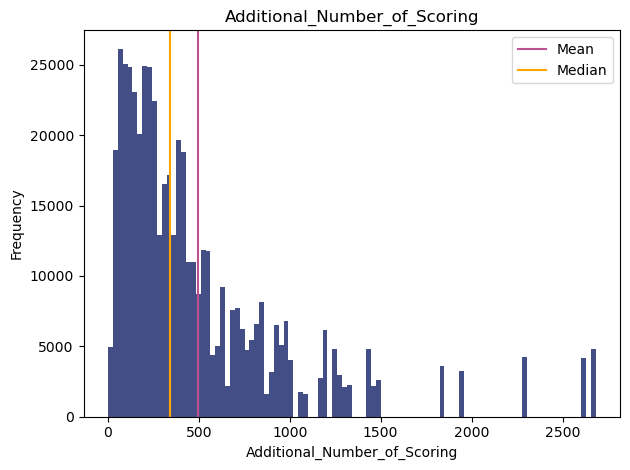

In [11]:
plt.figure()

plt.hist(data_raw['Additional_Number_of_Scoring'], bins= 100,color='#444e86')
plt.title('Additional_Number_of_Scoring')
plt.xlabel('Additional_Number_of_Scoring')
plt.ylabel('Frequency')
plt.axvline(data_raw['Additional_Number_of_Scoring'].mean(), c = '#bc5090', label = 'Mean')
plt.axvline(data_raw['Additional_Number_of_Scoring'].median(), c ='#ffa600', label = "Median")
plt.legend()

plt.tight_layout()
plt.show()

We simply regard the column as additional scoring information and stop the analysis at this point. 

In [12]:
data_raw.head(4)

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,6
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,52.360576,4.915968,3,8,2017,0,1,0,0,0,0,1,0,0,0,0,0,1,4
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,52.360576,4.915968,31,7,2017,1,0,0,0,0,0,1,0,0,0,0,0,1,3
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,52.360576,4.915968,31,7,2017,0,0,0,1,0,0,1,0,0,0,0,0,1,3


In [13]:
#Testing the negative reviews

import string
random_test = list(np.random.choice(range(1, 515737), size=35, replace=False))

for i in random_test:
    s1 = data_raw.loc[i,['Negative_Review']].item()
    if len(s1.split(' ')) == data_raw.loc[i,['Review_Total_Negative_Word_Counts']].item():
        continue # skip columns with a review or no difference between count and sentence 
    else:
        a = len(s1.split(' '))-data_raw.loc[i,['Review_Total_Negative_Word_Counts']].item()
        value = data_raw.loc[i,['Negative_Review']].item()
        print(f'subtraction: {a} and value: {value}')



subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative


The column ‘Review_Total_Negative_Word_Counts’ counts the number of values: The expression No Negative means that no negative comment was entered in the questionnaire. 

In [14]:
# sanity check fpr Positive_review

random_test = list(np.random.choice(range(1, 515737), size=35, replace=False))

for i in random_test:
    s1 = data_raw.loc[i,['Positive_Review']].item()
    if len(s1.split(' ')) == data_raw.loc[i,['Review_Total_Positive_Word_Counts']].item():
        continue
    else:
        a = len(s1.split(' '))-data_raw.loc[i,['Review_Total_Positive_Word_Counts']].item()
        value = data_raw.loc[i,['Positive_Review']].item()
        print(f'subtraction: {a} and value: {value}')

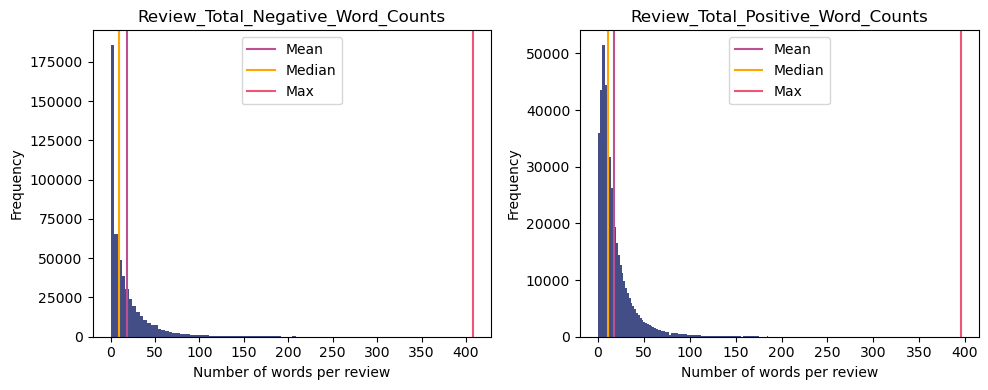

number of no negative/ empty text fields reviews: 127890, number of no positive/ empty text fields reviews: 35946


In [15]:

a = (data_raw['Review_Total_Negative_Word_Counts']== 0).sum()
b = (data_raw['Review_Total_Positive_Word_Counts']== 0).sum()

plt.subplots(1,2, figsize = (10,4))

plt.subplot(1,2,1)
plt.hist(data_raw['Review_Total_Negative_Word_Counts'], bins= 100,color='#444e86')
plt.title('Review_Total_Negative_Word_Counts')
plt.xlabel('Number of words per review')
plt.axvline(data_raw['Review_Total_Negative_Word_Counts'].mean(), c = '#bc5090', label = 'Mean')
plt.axvline(data_raw['Review_Total_Negative_Word_Counts'].median(), c ='#ffa600', label = "Median")
plt.axvline(data_raw['Review_Total_Negative_Word_Counts'].max(),c ='#ef5675', label = 'Max')
plt.ylabel('Frequency')
plt. legend(loc='upper center')

plt.subplot(1,2,2)
plt.hist(data_raw['Review_Total_Positive_Word_Counts'], bins= 200,color='#444e86')
plt.title('Review_Total_Positive_Word_Counts')
plt.xlabel('Number of words per review')
plt.axvline(data_raw['Review_Total_Positive_Word_Counts'].mean(), c = '#bc5090', label = 'Mean')
plt.axvline(data_raw['Review_Total_Positive_Word_Counts'].median(), c ='#ffa600', label = "Median")
plt.axvline(data_raw['Review_Total_Positive_Word_Counts'].max(),c ='#ef5675', label = 'Max')
plt.ylabel('Frequency')

plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

print(f'number of no negative/ empty text fields reviews: {a}, number of no positive/ empty text fields reviews: {b}')


We can conclude from this that the willingness to make a written statement is higher when positive feedback is given. In the case of negative feedback, more precise details are often not given. 

The connection between text and Review_Total_Negative/Positve_Word_Counts and Positive/Negative_Review is clear, the confusion was caused by the statement No Negative/No Positive.

#### Creating of the clean dataframe

In [16]:
print(c)

['Additional_Number_of_Scoring', 'Average_Score', 'Negative_Review', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Positive_Review', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Days_Since_Review', 'Latitude', 'Longitude', 'Day', 'Month', 'Year', 'Reviewer_Nationality_Australia', 'Reviewer_Nationality_Ireland', 'Reviewer_Nationality_UAE', 'Reviewer_Nationality_UK', 'Reviewer_Nationality_USA', 'Reviewer_Nationality_Other', 'Hotel_Address_Amsterdam', 'Hotel_Address_Barcelona', 'Hotel_Address_London', 'Hotel_Address_Milan', 'Hotel_Address_Paris', 'Hotel_Address_Vienna', 'Leisure_Trip', 'Nights_Stayed']


In [17]:
data = data_raw[[
    c[8], # target column
    c[2],c[5], # Reviews
    c[3],c[6],c[27],c[28],c[9],c[12],c[13],c[14],c[0],c[15],c[16],c[17],c[18],c[19],c[20],c[7], #Review adddition information columns
    c[1],c[4],c[21],c[22],c[23],c[24],c[25],c[26],c[10],c[11] #Hotel information columns 
]]

In [18]:
data.head(3)

,Reviewer_Score,Negative_Review,Positive_Review,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Leisure_Trip,Nights_Stayed,Days_Since_Review,Day,Month,Year,Additional_Number_of_Scoring,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Total_Number_of_Reviews_Reviewer_Has_Given,Average_Score,Total_Number_of_Reviews,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Latitude,Longitude
0,0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,397,11,1,6,0,3,8,2017,194,0,0,0,0,0,1,7,7.7,1403,1,0,0,0,0,0,52.360576,4.915968
1,0,No Negative,No real complaints the hotel was great great ...,0,105,1,4,0,3,8,2017,194,0,1,0,0,0,0,7,7.7,1403,1,0,0,0,0,0,52.360576,4.915968
2,0,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,42,21,1,3,3,31,7,2017,194,1,0,0,0,0,0,9,7.7,1403,1,0,0,0,0,0,52.360576,4.915968


#### Exploration 

Die Tage, Monate und Jahre zu einer Spalte zusammenfassen und die einzelnen Spalten (Tag, Monat, Jahr) entfernen.

In [19]:
pd.to_datetime(data[['Year', 'Month', 'Day']]).min()

Timestamp('2015-08-04 00:00:00')

In [20]:
data.insert(8, 'Date', pd.to_datetime(data[['Year', 'Month', 'Day']]))

In [21]:
data = data.drop(columns=['Day', 'Month', 'Year'] ,axis=1)

In [22]:
data.duplicated().sum()

539

In [23]:
data[data.duplicated(keep=False)].head(4)

,Reviewer_Score,Negative_Review,Positive_Review,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Leisure_Trip,Nights_Stayed,Days_Since_Review,Date,Additional_Number_of_Scoring,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Total_Number_of_Reviews_Reviewer_Has_Given,Average_Score,Total_Number_of_Reviews,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Latitude,Longitude
22083,1,Nothing,Good Service,2,3,0,4,0,2017-08-03,83,0,0,0,0,0,1,5,8.3,549,0,0,0,0,1,0,48.849143,2.339712
22084,1,Nothing,Good Service,2,3,0,4,0,2017-08-03,83,0,0,0,0,0,1,5,8.3,549,0,0,0,0,1,0,48.849143,2.339712
23703,1,none,good location and super nice staff room is bi...,2,13,0,1,159,2017-02-25,728,0,0,0,0,0,1,39,8.9,3168,0,0,1,0,0,0,51.528677,-0.128349
23704,1,none,good location and super nice staff room is bi...,2,13,0,1,159,2017-02-25,728,0,0,0,0,0,1,39,8.9,3168,0,0,1,0,0,0,51.528677,-0.128349


Um die Duplikate zu untersuchen ist es wichtig, die Spalten des Hotels auszuschließen. Diese sind kein Kriterium um ein echtes Duplikat von einem zufälligen zu unterscheiden. Daher wird ein Dataframe duplicate erstellt. 

In [24]:
duplicate = data[data.duplicated(keep = False)].loc[:, 'Negative_Review':'Total_Number_of_Reviews_Reviewer_Has_Given']

durch die loc-Funktion bleibt die Indexierung erhalten. Wir prüfen nun, wie viele 'echte Duplicate' erhalten bleiben, wenn die Hotelkriterien nicht berücksichtigt werden.

In [25]:
duplicate.duplicated().sum()

539

539 = 539, dies bedeutet, dass die Hotelangaben kein Grund für das Duplikat waren. Nun schauen wir uns die Antworten genauer an.

In [26]:
duplicate.head(10)

,Negative_Review,Positive_Review,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Leisure_Trip,Nights_Stayed,Days_Since_Review,Date,Additional_Number_of_Scoring,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Total_Number_of_Reviews_Reviewer_Has_Given
22083,Nothing,Good Service,2,3,0,4,0,2017-08-03,83,0,0,0,0,0,1,5
22084,Nothing,Good Service,2,3,0,4,0,2017-08-03,83,0,0,0,0,0,1,5
23703,none,good location and super nice staff room is bi...,2,13,0,1,159,2017-02-25,728,0,0,0,0,0,1,39
23704,none,good location and super nice staff room is bi...,2,13,0,1,159,2017-02-25,728,0,0,0,0,0,1,39
61875,No Negative,The attention received by Sebastian and his t...,0,12,1,2,7,2017-07-27,300,0,0,0,0,0,1,4
61876,No Negative,The attention received by Sebastian and his t...,0,12,1,2,7,2017-07-27,300,0,0,0,0,0,1,4
68936,Location is very old not invested in past yea...,Location is central accessible by train parki...,41,12,0,1,41,2017-06-23,11,0,0,0,0,0,1,24
68937,This hotel I don t think so is 4 star B B hav...,Nothing,93,2,0,1,98,2017-04-27,11,0,0,0,1,0,0,10
68938,The staff were not helpful at all It took us ...,Near bus terminal,69,4,1,4,152,2017-03-04,11,0,0,0,0,0,1,4
68939,We booked hotel for 3 nights and there was no...,Good place,39,4,0,3,287,2016-10-20,11,0,0,0,0,0,1,9


Die Duplicate scheinen echte Duplikate zu sein, auch wenn diese nicht immer an aufeinanderfolgenden Indexpostitionen erscheienen. Die Duplikate werden daher in data gelöscht. 

In [27]:
data = data.drop_duplicates(keep='first')

In [28]:
data.duplicated().sum()

0

Check for missing data: 

In [29]:
data.isna().sum()

Reviewer_Score                                0
Negative_Review                               0
Positive_Review                               0
Review_Total_Negative_Word_Counts             0
Review_Total_Positive_Word_Counts             0
Leisure_Trip                                  0
Nights_Stayed                                 0
Days_Since_Review                             0
Date                                          0
Additional_Number_of_Scoring                  0
Reviewer_Nationality_Australia                0
Reviewer_Nationality_Ireland                  0
Reviewer_Nationality_UAE                      0
Reviewer_Nationality_UK                       0
Reviewer_Nationality_USA                      0
Reviewer_Nationality_Other                    0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Average_Score                                 0
Total_Number_of_Reviews                       0
Hotel_Address_Amsterdam                       0
Hotel_Address_Barcelona                 

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515199 entries, 0 to 515737
Data columns (total 27 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Reviewer_Score                              515199 non-null  int64         
 1   Negative_Review                             515199 non-null  object        
 2   Positive_Review                             515199 non-null  object        
 3   Review_Total_Negative_Word_Counts           515199 non-null  int64         
 4   Review_Total_Positive_Word_Counts           515199 non-null  int64         
 5   Leisure_Trip                                515199 non-null  int64         
 6   Nights_Stayed                               515199 non-null  int64         
 7   Days_Since_Review                           515199 non-null  int64         
 8   Date                                        515199 non-null  datetime64[ns]
 9 

To make sure, that the index is equal to the row number we reset the index and safe the dataset 

In [31]:
data = data.reset_index(drop= True)

In [32]:
data.describe()

,Reviewer_Score,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Leisure_Trip,Nights_Stayed,Days_Since_Review,Date,Additional_Number_of_Scoring,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Total_Number_of_Reviews_Reviewer_Has_Given,Average_Score,Total_Number_of_Reviews,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Latitude,Longitude
count,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000
mean,0.570100,18.540711,17.778489,0.810070,2.361750,354.402120,2016-08-13 14:20:56.802129152,498.417604,0.042019,0.028754,0.019853,0.475752,0.068612,0.365010,7.164750,8.397776,2744.691424,0.111043,0.116747,0.509110,0.072209,0.115319,0.075573,49.433012,2.893915
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2015-08-04 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.200000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.328376,-0.369758
25%,0.000000,2.000000,5.000000,1.000000,1.000000,175.000000,2016-02-23 00:00:00,169.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.100000,1161.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.214066,-0.143372
50%,1.000000,9.000000,11.000000,1.000000,2.000000,353.000000,2016-08-15 00:00:00,342.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,8.400000,2134.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,51.499981,0.019886
75%,1.000000,23.000000,22.000000,1.000000,3.000000,527.000000,2017-02-09 00:00:00,660.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,8.000000,8.800000,3633.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,51.516288,4.841163
max,1.000000,408.000000,395.000000,1.000000,31.000000,730.000000,2017-08-03 00:00:00,2682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,355.000000,9.800000,16670.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.400181,16.429233
std,0.495062,29.693602,21.804665,0.392246,1.646734,208.909135,NaN,500.673193,0.200632,0.167114,0.139494,0.499412,0.252794,0.481434,11.039315,0.547947,2318.112418,0.314185,0.321119,0.499917,0.258834,0.319406,0.264314,3.461933,4.669672


In [33]:
data['Leisure_Trip'].loc[data['Leisure_Trip']==1].count()

417347

Of the 515,199 reviews, 293,715 or 57% are positive. On average, a negative review is slightly longer than a positive one. 81% or 417,347 of the trips reviewed were leisure trips. The average length of these trips was 2.3 nights.

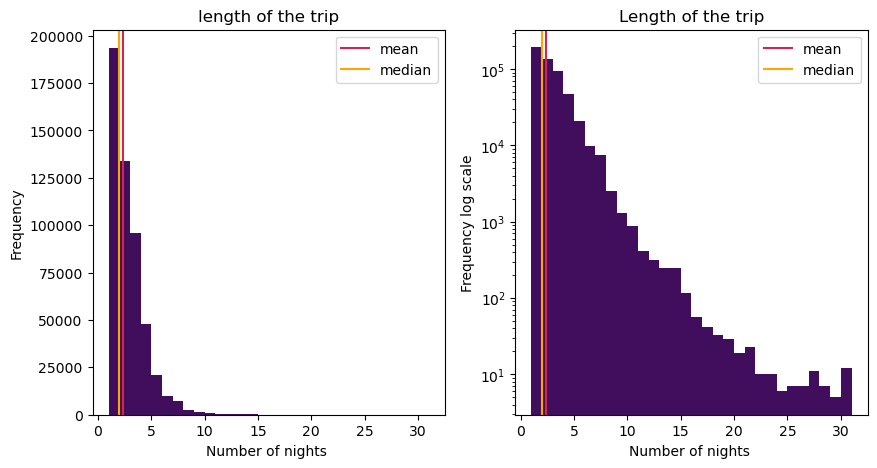

In [34]:
plt.subplots(1,2, figsize= (10,5))
plt.subplot(1,2,1)
plt.hist(data['Nights_Stayed'], bins = 30 ,color ='#400e5c')
plt.axvline(data['Nights_Stayed'].mean(), label='mean', color = '#cd2753')
plt.axvline(data['Nights_Stayed'].median(), label = 'median', color = '#ffa600')
plt.legend()
plt.title('length of the trip')
plt.ylabel('Frequency')
plt.xlabel('Number of nights ')

plt.subplot(1,2,2)
plt.hist(data['Nights_Stayed'], bins = 30 ,color ='#400e5c')
plt.axvline(data['Nights_Stayed'].mean(), label='mean', color = '#cd2753')
plt.axvline(data['Nights_Stayed'].median(), label = 'median', color = '#ffa600')
plt.legend()
plt.yscale('log') #to visualize the values between ~10 and 30 days
plt.title('Length of the trip')
plt.ylabel('Frequency log scale')
plt.xlabel('Number of nights ')
plt.show()

The majority of the reviews include short stays and not week-long holidays. 

In [35]:
data.head(1)

,Reviewer_Score,Negative_Review,Positive_Review,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Leisure_Trip,Nights_Stayed,Days_Since_Review,Date,Additional_Number_of_Scoring,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Total_Number_of_Reviews_Reviewer_Has_Given,Average_Score,Total_Number_of_Reviews,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Latitude,Longitude
0,0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,397,11,1,6,0,2017-08-03,194,0,0,0,0,0,1,7,7.7,1403,1,0,0,0,0,0,52.360576,4.915968


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515199 entries, 0 to 515198
Data columns (total 27 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Reviewer_Score                              515199 non-null  int64         
 1   Negative_Review                             515199 non-null  object        
 2   Positive_Review                             515199 non-null  object        
 3   Review_Total_Negative_Word_Counts           515199 non-null  int64         
 4   Review_Total_Positive_Word_Counts           515199 non-null  int64         
 5   Leisure_Trip                                515199 non-null  int64         
 6   Nights_Stayed                               515199 non-null  int64         
 7   Days_Since_Review                           515199 non-null  int64         
 8   Date                                        515199 non-null  datetime64[ns

In [37]:
A = data.loc[data['Hotel_Address_Amsterdam']==1]['Reviewer_Score'].mean()*100
B = data.loc[data['Hotel_Address_Barcelona']==1]['Reviewer_Score'].mean()*100
L = data.loc[data['Hotel_Address_London']==1]['Reviewer_Score'].mean()*100
M = data.loc[data['Hotel_Address_Milan']==1]['Reviewer_Score'].mean()*100
P = data.loc[data['Hotel_Address_Paris']==1]['Reviewer_Score'].mean()*100
V = data.loc[data['Hotel_Address_Vienna']==1]['Reviewer_Score'].mean()*100

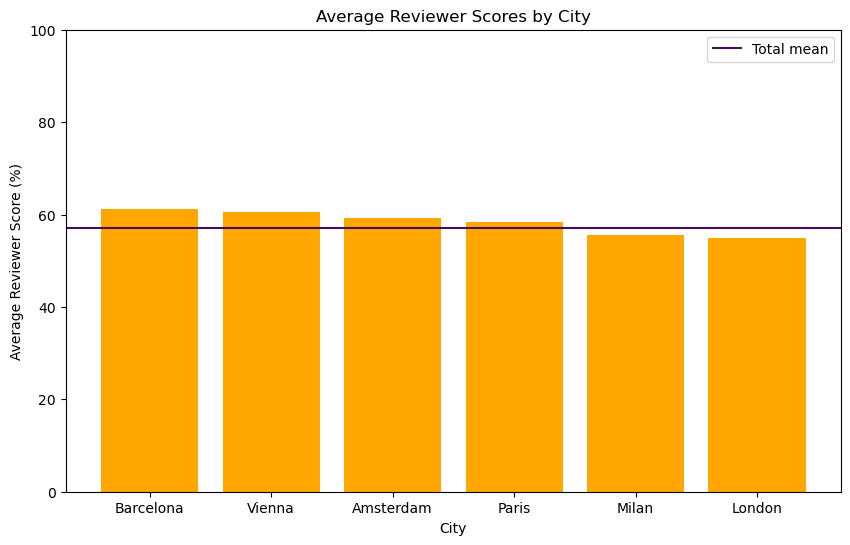

In [38]:
scores = {
    'Barcelona': B,
    'Vienna': V,
    'Amsterdam': A,
    'Paris': P,
    'Milan': M,
    'London': L
}
df_scores = pd.DataFrame(list(scores.items()), columns=['City', 'Average Reviewer Score']) # create a dataframe for visualization

plt.figure(figsize=(10, 6))
plt.bar(df_scores['City'], df_scores['Average Reviewer Score'], color='#ffa600')
plt.xlabel('City')
plt.ylabel('Average Reviewer Score (%)')
plt.title('Average Reviewer Scores by City')
plt.ylim(0, 100)
plt.axhline(y= data['Reviewer_Score'].mean()*100, color='#400e5c', label = 'Total mean')
plt.legend()
plt.show()

Hotel guest satisfaction varies from city to city. Overall, hotel guests in Vienna and Barcelona are more satisfied than those in London and Milan. These cities underperform in terms of customer satisfaction. 

In [39]:
from matplotlib.lines import Line2D
colors = data['Reviewer_Score'].map({0:'#003f5c', 1:'#ffa600'})

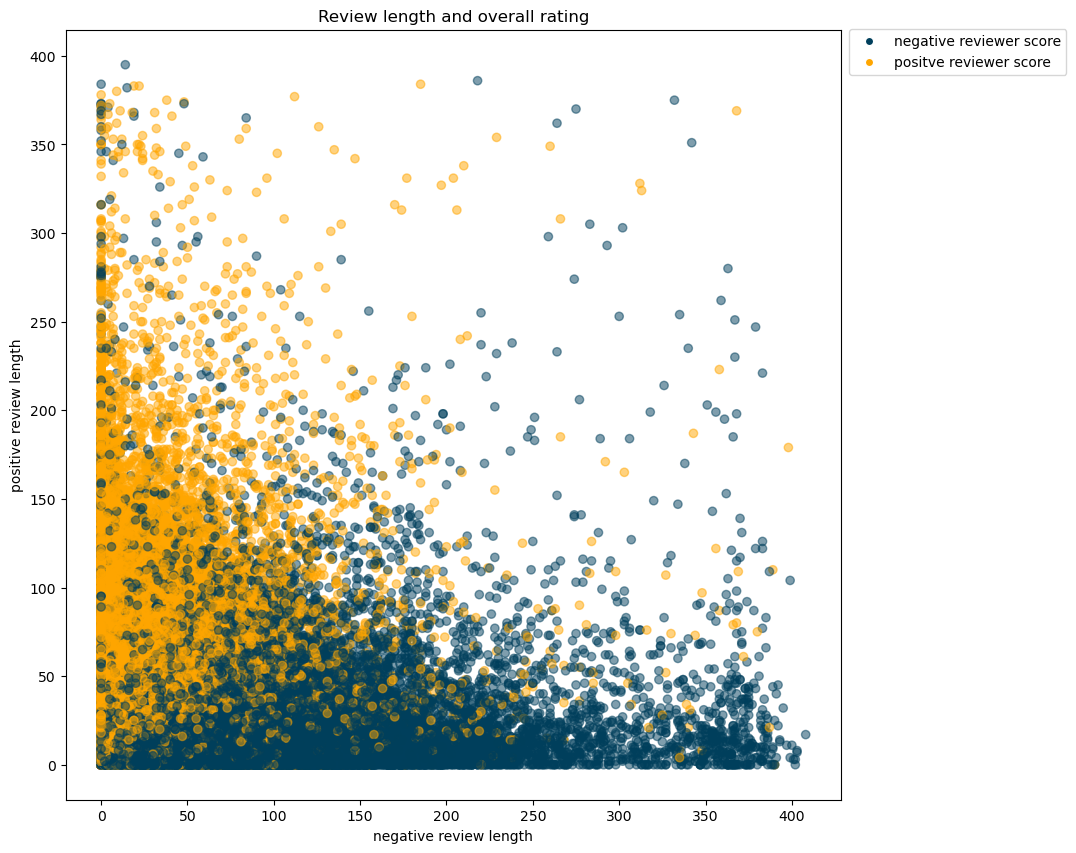

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(x=data['Review_Total_Negative_Word_Counts'],y=data['Review_Total_Positive_Word_Counts'], color = colors, alpha= 0.5)
plt.ylabel('positive review length')
plt.xlabel('negative review length')

custom_lines = [Line2D([0], [0], color='w',markerfacecolor='#003f5c',marker='o', lw=2, label = 'negative reviewer score'),
                Line2D([0], [0], color='w',markerfacecolor='#ffa600',marker='o', lw=2,label = 'positve reviewer score')]

plt.title('Review length and overall rating')
plt.legend(handles= custom_lines, loc ='upper right', bbox_to_anchor=(1.30, 1.01))
plt.show()

Sources:          
https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas.Series.map            
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html           
https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html#sphx-glr-gallery-text-labels-and-annotations-custom-legends-py           

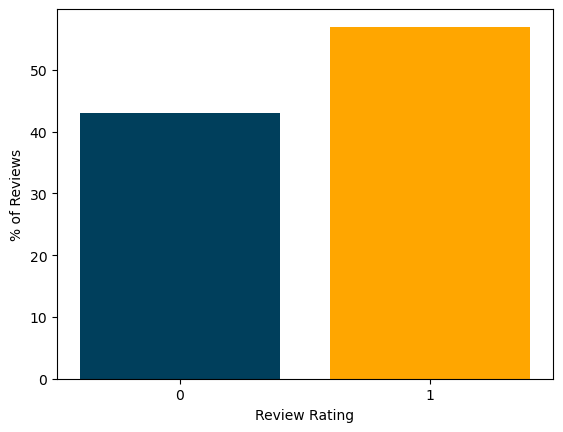

Class imbalance: [0.43 0.57]


In [41]:
values, counts = np.unique(data['Reviewer_Score'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(["0", "1"], normalized_counts*100, color = ['#003f5c','#ffa600'])
plt.xlabel('Review Rating')
plt.ylabel('% of Reviews')
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

We see a correlation between the length of the positive and negative statements and the reviewer's overall rating. If both texts, i.e. the positive and the negative text, are approximately the same length, there seems to be a tendency to mark the overall experience as positive (yellow). The respective extreme ranges are interesting. For example, there are reviewers who write long positive texts and short negative texts and still give a negative overall rating. The total length of a review therefore does not have an absolute influence on the result. The correlation is examined below

### 4.2 Preprocessing


First, create a dataframe which only contains the columns of 'intrest' - e.g. the review texts and the reviewer score.

In [42]:
reviews = data.loc[:,['Reviewer_Score','Negative_Review','Positive_Review']]

In [43]:
from sklearn.model_selection import train_test_split

Split our dataframe reviews into a test and a train set

In [44]:
y = reviews['Reviewer_Score']
X = reviews[['Negative_Review','Positive_Review']]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)


Now we split X_train and X_test in X_train_neg/ X_train_pos and X_test_neg/X_test_pos for performance reasons. Let's have a look to get an better understanding. 

In [46]:
X_train.head()

,Negative_Review,Positive_Review
279256,Toilet paper Towels,Check in and check out process Breakfast Room...
29104,Room was quite small,Good air conditioning and quiet thanks to tri...
314288,No Negative,Very comfortable beds beautiful building in n...
100686,We booked an outdoor terrace which made it mu...,The hotel is beautiful and it smells amazing ...
85564,We loved everything,Our room was beautiful It was large too which...


X_train and X_test contain 2 columns - one for the negative and one for the positive Review text. Due to the large number of entries and in order to maintain an overview, the positive and negative reviews are saved in separate data frames. We split them. 

In [47]:
X_train_neg = X_train['Negative_Review']
X_train_pos = X_train['Positive_Review']
X_test_neg = X_test['Negative_Review']
X_test_pos = X_test['Positive_Review']

In [48]:
print(f'X_train_neg: {X_train_neg.shape}, X_train_pos: {X_train_pos.shape} and y_train:{y_train.shape}')
print(f'X_test_neg: {X_test_neg.shape}, X_test_pos: {X_test_pos.shape} and y_test: {y_test.shape}')

X_train_neg: (412159,), X_train_pos: (412159,) and y_train:(412159,)
X_test_neg: (103040,), X_test_pos: (103040,) and y_test: (103040,)


No we tokenize our data

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
# 1. Instantiate the tokenizer
bagofwords_pos = CountVectorizer() 

# 2. fit
bagofwords_pos.fit(X_train_pos)

# 3. Transform
X_train_pos_transformed = bagofwords_pos.transform(X_train_pos)


In [51]:
# 1. Instantiate the tokenizer
bagofwords_neg = CountVectorizer() 

# 2. fit
bagofwords_neg.fit(X_train_neg)

# 3. Transform
X_train_neg_transformed = bagofwords_neg.transform(X_train_neg)

We have created a sparse matrix with each of these two code blocks. Each comment was split into its words and these were created as columns in the matrix. Each word only appears once in the columns. If this word now appears in the comment, a number corresponding to the number of words in the comment is created in the corresponding row. The resulting matrices are very large (see below), so it makes sense to divide them into positive comments and negative comments.

In [52]:
X_train_pos_transformed

<412159x45652 sparse matrix of type '<class 'numpy.int64'>'
	with 5613440 stored elements in Compressed Sparse Row format>

In X_train_pos_transformed we have 45652 unique tokens in a matrix of 412159 rows and 45652 columns. 

In [53]:
X_train_neg_transformed

<412159x49514 sparse matrix of type '<class 'numpy.int64'>'
	with 5704467 stored elements in Compressed Sparse Row format>

X_train_neg_transformed is even bigger with 412159 rows and 49514 columns e.g. tokens.

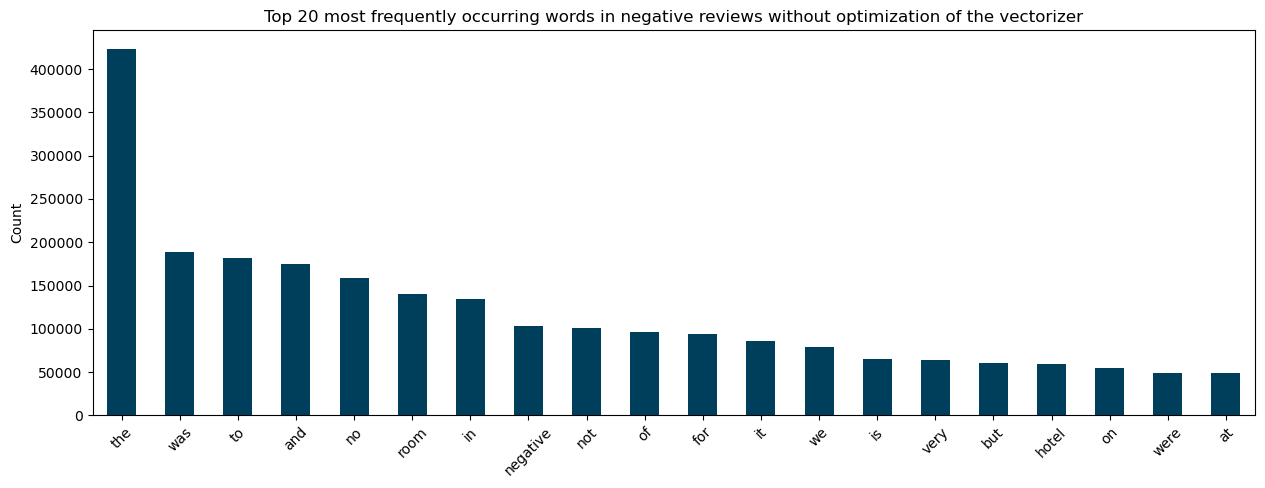

In [55]:
word_counts = pd.DataFrame(
    {"counts": X_train_neg_transformed.sum(axis=0).A1}, #alternative: .A.flatten() instead of .A1
    index=bagofwords_neg.get_feature_names()
).sort_values("counts", ascending=False)

# Plotting the top 20 most frequently occurring words
word_counts.head(20).plot(kind="bar", figsize=(15, 5),color='#003f5c',  legend=False)
plt.title("Top 20 most frequently occurring words in negative reviews without optimization of the vectorizer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

  The first approach with .toarray() wasn't working because of memory issues. I had to look up an alternative.  Using the .A1 to flatten the matrix inplace instead of creating an array. Somehow CountVectorizer' object has no attribute 'get_feature_names_out' - I use the get_feature_names instead. 


Sources:
https://stackoverflow.com/questions/73415826/          how-to-covert-a-large-106-106-numpy-sparse-matrix-to-a-scipy-sparse-matrix
https://numpy.org/doc/stable/reference/generated/numpy.matrix.html


We will now reduce the total number of tokens. We can see above that many words in the top 20 of the train_neg data example have no meaning. It can also be assumed that many words in the 412159x49514 matrix have no meaning and only cost memory space. Therefore, the CountVectoriser() method is extended by parameters and a function:

#### Finetuning of the final vectorizers

In [56]:
import joblib

In [82]:
# #1. Instantiate the tokenizer
# bagofwords_pos = CountVectorizer(stop_words='english',
# 								tokenizer = custom_tokenizer, 
# 								min_df =10, # the minimum occurance of a word in 5 reviews 
# 								max_features =500, #we limit the number of tokens to 1500
# 								ngram_range=(1, 3)) # to explode the features we include word combinations in this case: 2 words. for example: very good instead of very and good.

# # 2. fit
# bagofwords_pos.fit(X_train_pos)

# # 3. Transform
# X_train_pos_transformed = bagofwords_pos.transform(X_train_pos)

c:\Users\BMidd\.conda\envs\plotly_bokeh\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
c:\Users\BMidd\.conda\envs\plotly_bokeh\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor

Because of the long runtime, I only run this code once. Then I saved my customized model in ./models

In [83]:
# joblib.dump(bagofwords_pos, './models/bagofwords_pos.pkl')

['./models/bagofwords_pos.pkl']

In [84]:
# #1. Instantiate the tokenizer
# bagofwords_neg = CountVectorizer(stop_words='english',
# 								tokenizer = custom_tokenizer, 
# 								min_df =10, 
# 								max_features =500, 
# 								ngram_range=(1, 3)) # good in combination with min_df to get rid of useless pairs

# # 2. fit
# bagofwords_neg.fit(X_train_neg)

# joblib.dump(bagofwords_neg, './models/bagofwords_neg.pkl')
# # 3. Transform
# X_train_neg_transformed = bagofwords_neg.transform(X_train_neg)

#### Reload the fitted vectorizer 

In [183]:
bagofwords_pos = joblib.load('./models/bagofwords_pos.pkl')
bagofwords_neg = joblib.load('./models/bagofwords_neg.pkl')


#### Create the sparce matrices

Transform our X_train_pos and neg on the CountVectorizer() fitted model bagofwords. Also the X_test

In [158]:
# X_train_pos_transformed = bagofwords_pos.transform(X_train_pos)
# X_train_neg_transformed = bagofwords_neg.transform(X_train_neg)

c:\Users\BMidd\.conda\envs\plotly_bokeh\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [169]:
# sp.sparse.save_npz('./models/X_train_pos_transformed.npz', X_train_pos_transformed)
# sp.sparse.save_npz('./models/X_train_neg_transformed.npz', X_train_neg_transformed)

We transform the X_test_neg/X_test_pos. But we use the model from our training data. Therefore, any word that is in our test set and not in our train set will be ignored because the sparse matrix has no corresponding column

In [159]:
# X_test_neg_transformed = bagofwords_neg.transform(X_test_neg)
# X_test_pos_transformed = bagofwords_pos.transform(X_test_pos)

In [170]:
# sp.sparse.save_npz('./models/X_test_neg_transformed.npz', X_test_pos_transformed)
# sp.sparse.save_npz('./models/X_test_pos_transformed.npz', X_test_pos_transformed)

#### Reload sparce matrices

In [186]:
X_train_pos_transformed = sp.sparse.load_npz('./models/X_train_pos_transformed.npz')
X_train_neg_transformed = sp.sparse.load_npz('./models/X_train_neg_transformed.npz')
X_test_pos_transformed = sp.sparse.load_npz('./models/X_test_pos_transformed.npz')
X_test_pos_transformed = sp.sparse.load_npz('./models/X_test_pos_transformed.npz')

In [187]:
X_train_neg_transformed

<412159x500 sparse matrix of type '<class 'numpy.int64'>'
	with 2297035 stored elements in Compressed Sparse Row format>

In [188]:
X_train_pos_transformed

<412159x500 sparse matrix of type '<class 'numpy.int64'>'
	with 3415605 stored elements in Compressed Sparse Row format>

#### Visualization of the sparce matrices

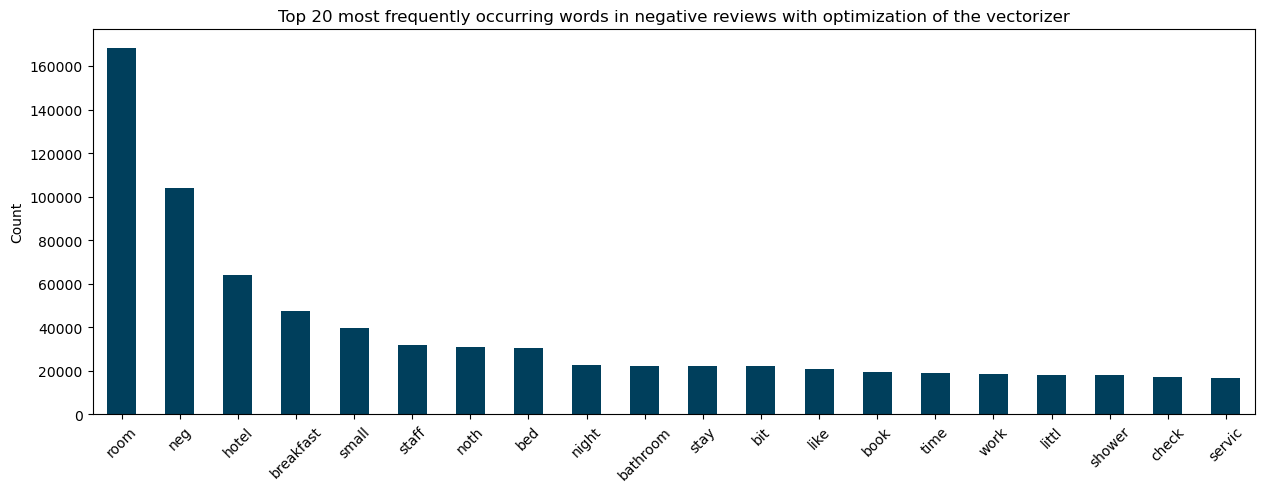

In [189]:
word_counts_neg = pd.DataFrame(
    {"counts": X_train_neg_transformed.sum(axis=0).A1}, #alternative: .A.flatten() instead of .A1
    index=bagofwords_neg.get_feature_names()
).sort_values("counts", ascending=False)

# Plotting the top 20 most frequently occurring words
word_counts_neg.head(20).plot(kind="bar", figsize=(15, 5),color='#003f5c',  legend=False)
plt.title("Top 20 most frequently occurring words in negative reviews with optimization of the vectorizer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

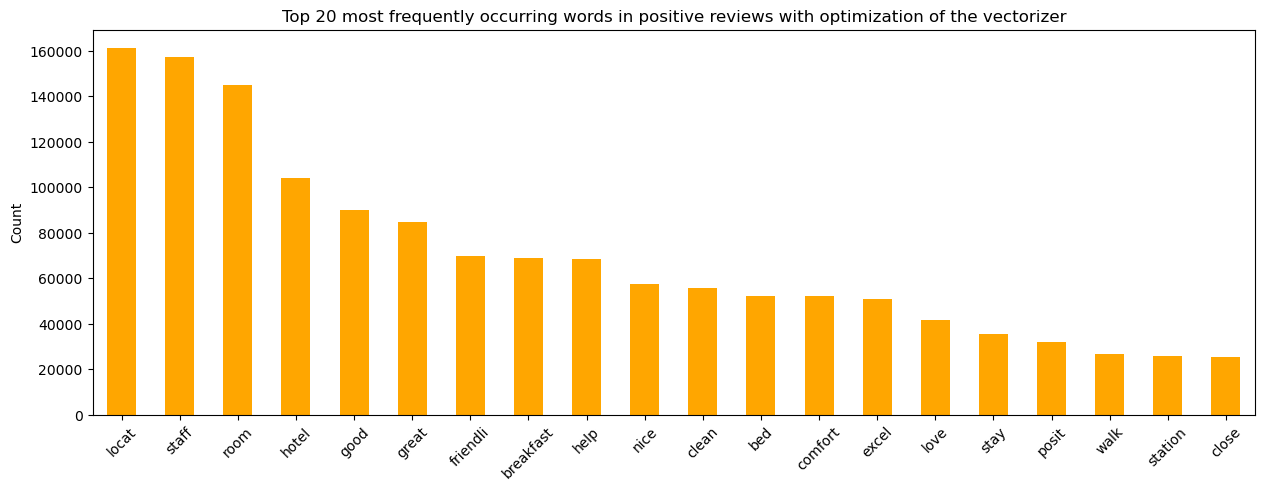

In [195]:
word_counts_pos = pd.DataFrame(
    {"counts": X_train_pos_transformed.sum(axis=0).A1}, #alternative: .A.flatten() instead of .A1
    index=bagofwords_pos.get_feature_names()
).sort_values("counts", ascending=False)

# Plotting the top 20 most frequently occurring words
word_counts_pos.head(20).plot(kind="bar", figsize=(15, 5),color='#ffa600',  legend=False)
plt.title("Top 20 most frequently occurring words in positive reviews with optimization of the vectorizer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Wir sehen nun, dass wir eine präzisere Auswahl an Wörtern haben und wir deshalb eine in der Qualität angereicherte sparse Matrix haben. 

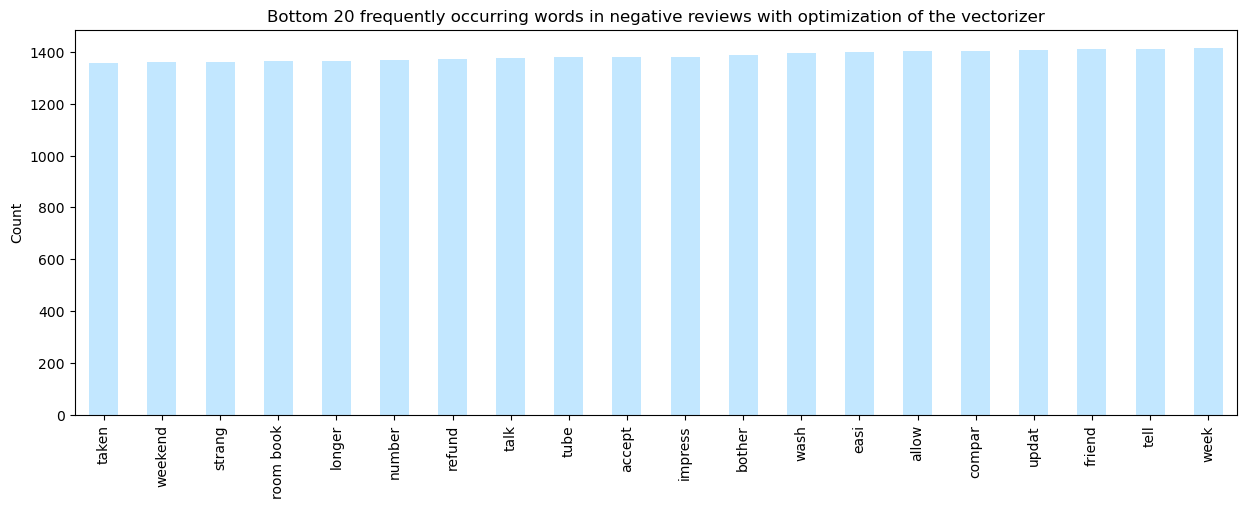

In [191]:
word_counts_neg.sort_values('counts', ascending =True).head(20).plot(kind="bar", figsize=(15, 5),color='#c2e7ff',  legend=False)
plt.title("Bottom 20 frequently occurring words in negative reviews with optimization of the vectorizer")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

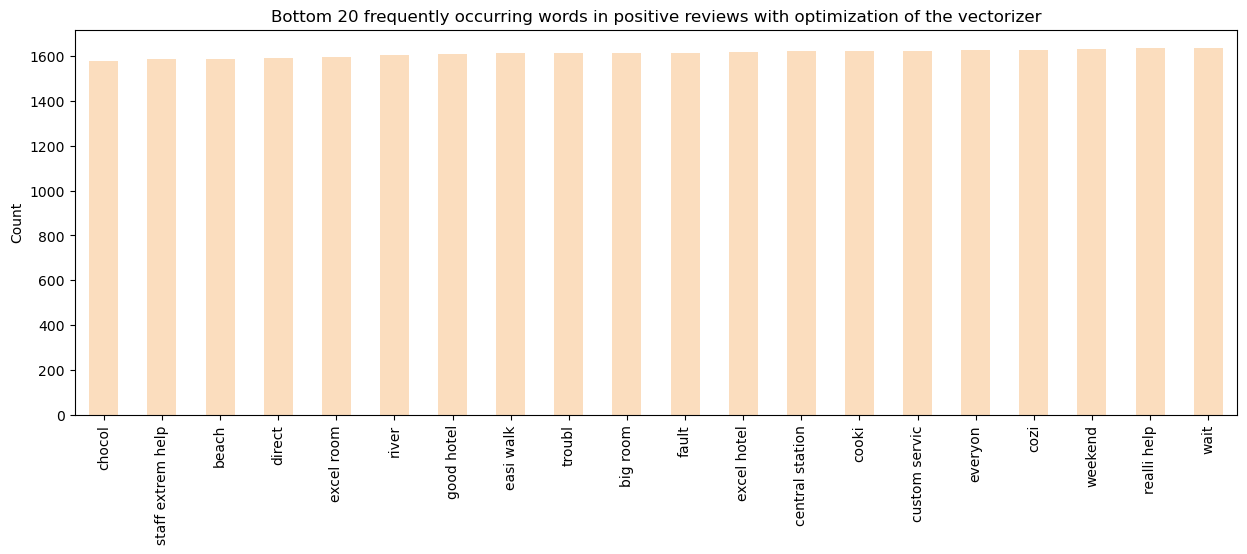

In [192]:
word_counts_pos.sort_values('counts', ascending =True).head(20).plot(kind="bar", figsize=(15, 5),color='#fbddbe',  legend=False)
plt.title("Bottom 20 frequently occurring words in positive reviews with optimization of the vectorizer")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


#### Prepartation of the concating of the matrices 

In [230]:
token_neg = bagofwords_neg.get_feature_names()
new_vocab_neg = ["neg_" + token for token in token_neg]
vocab_mapping_neg = {old: new for old, new in zip(token_neg, new_vocab_neg)}

# renamed matrix
X_train_neg_transformed = rename_tokens(X_train_neg_transformed, vocab_mapping_neg, token_neg)

In [231]:
token_pos = bagofwords_pos.get_feature_names()
new_vocab_pos = ["neg_" + token for token in token_pos]

vocab_mapping_pos = {old: new for old, new in zip(token_pos, new_vocab_pos)}

#renamed matrix
X_train_pos_transformed = rename_tokens(X_train_pos_transformed, vocab_mapping_pos, token_pos)

Sanity check:

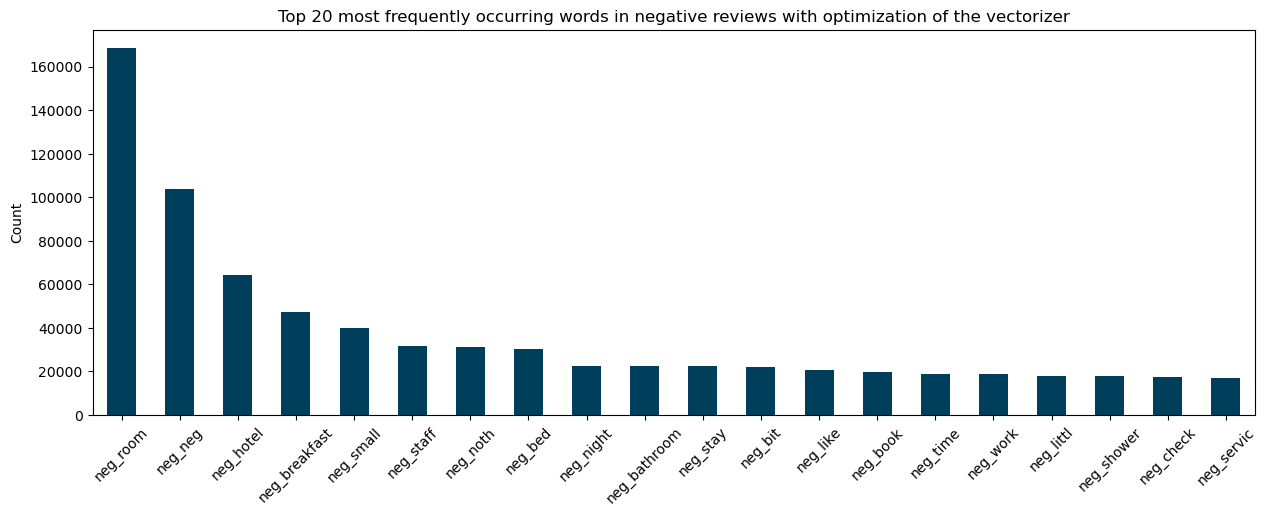

In [232]:
word_counts_neg = pd.DataFrame(
    {"counts": X_train_neg_transformed.sum(axis=0).A1}, #alternative: .A.flatten() instead of .A1
    index=new_vocab_neg
).sort_values("counts", ascending=False)

# Plotting the top 20 most frequently occurring words
word_counts_neg.head(20).plot(kind="bar", figsize=(15, 5),color='#003f5c',  legend=False)
plt.title("Top 20 most frequently occurring words in negative reviews with optimization of the vectorizer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

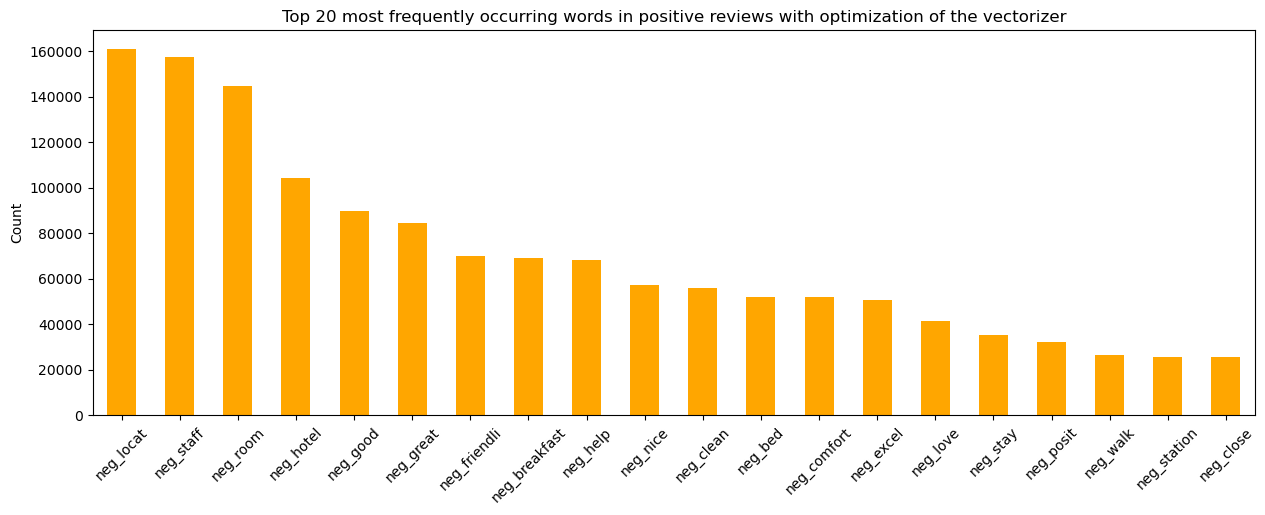

In [233]:
word_counts_pos = pd.DataFrame(
    {"counts": X_train_pos_transformed.sum(axis=0).A1}, #alternative: .A.flatten() instead of .A1
    index=new_vocab_pos
).sort_values("counts", ascending=False)


# Plotting the top 20 most frequently occurring words
word_counts_pos.head(20).plot(kind="bar", figsize=(15, 5),color='#ffa600',  legend=False)
plt.title("Top 20 most frequently occurring words in positive reviews with optimization of the vectorizer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### 4.3 Logistic regression model


In [228]:
X_train_neg_transformed.shape

(412159, 500)

In [229]:
X_train_pos_transformed.shape

(412159, 500)

We will stack these two sparse matrices horizontally (column wise)

In [234]:
from scipy.sparse import hstack

X_train_transformed_complete = hstack([X_train_pos_transformed,X_train_neg_transformed])

In [235]:
X_train_transformed_complete

<412159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 5712640 stored elements in Compressed Sparse Row format>

In [245]:
X_test_pos_transformed.shape

(103040, 500)

In [248]:
X_test_neg_transformed.shape

(103040, 500)

In [249]:
X_test_transformed_complete = hstack([X_test_pos_transformed,X_test_neg_transformed])

Source :https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.hstack.html#scipy.sparse.hstack

In [243]:
np.random.seed(16341)

logreg = LogisticRegression(C=0.1, max_iter= 1000)
logistic_regression_model =logreg.fit(X_train_transformed_complete, y_train)

In [250]:
print(f"Train score: {logistic_regression_model.score(X_train_transformed_complete, y_train)}")
print(f"Test score: {logistic_regression_model.score(X_test_transformed_complete, y_test)}")


Train score: 0.786220851661616
Test score: 0.785151397515528


### 4.4 PCA with a decision tree classifier

### 4.5 In-depth evaluation